## HRES-HSAF Post-processing

This script is designed to perform postprocessing on HRES/HSAF date.

The script applies the following for HRES data:

* Takes preprocessed HRES data, which includes only the "pr" variable representing precipitation, and reformats it back into the original format (The original HRES files contain multiple variables, including the "tp" variable for precipitation)

* Restores the original format of the HRES files while retaining the cumulative precipitation information from the preprocessed data.

* Converts precip from `mm` back to `m`

The script applies the following for HSAF data:


In [2]:
# import libraries and directories
from py_env_hpc import *

### 1. Original HRES

In [6]:
# Define the start and end dates for the loop
date_start = "2020-07-01"
date_end = "2023-04-26"

# Open the preprocessed data
preprocessed_file = os.path.join(ATMOS_DATA, "HRES_pr.nc")
pre_HRES = xr.open_dataset(preprocessed_file)

# Iterate through each day in the date range
current_date = pd.to_datetime(date_start)
prev_month = None

while current_date <= pd.to_datetime(date_end):

    # Convert the current date to the required format
    current_date_str = current_date.strftime("%Y%m%d")
    
    # Define the file names
    original_file = os.path.join(HRES_OR, f"ADAPTER_DE05_{current_date_str}.12.0-90-1.boundary_1.nc")
    
    # Define the output directory path
    output_dir = os.path.join(PARFLOWCLM2, "sim", "ADAPTER_DE05_ECMWF-HRES_detforecast__FZJ-IBG3-ParFlowCLM380D_v03bJuwelsGpuProdClimatologyTl_PRhourly", "forcing", "o.data.MARS_retrieval", current_date.strftime("%Y"))

    # Create the output directory if it doesn't exist
    os.makedirs(output_dir, exist_ok=True)

    # Define the output file path within the output directory
    output_file = os.path.join(output_dir, f"ADAPTER_DE05_{current_date_str}.12.0-90-1.boundary_1.nc")

    # Open the original file
    orig_HRES = xr.open_dataset(original_file)

    # Find the common dates between pre_HRES and orig_HRES
    common_dates = sorted(list(set(pre_HRES.time.values) & set(orig_HRES.time.values)))

    # Get the indices for the common dates in pre_HRES and orig_HRES
    preprocessed_indices = np.where(np.isin(pre_HRES.time.values, common_dates))[0]
    original_indices = np.where(np.isin(orig_HRES.time.values, common_dates))[0]

    # Convert the data from preprocessed HRES to cumulative
    cumulative_data = np.cumsum(pre_HRES.pr.values[preprocessed_indices], axis=0)

    # Replace precipitation data in the preprocessed file with original data
    orig_HRES["tp"].values[original_indices] = cumulative_data/1000

    # Add a history attribute to the original file
    orig_HRES.attrs["history"] = "postprocessed by Kaveh - ATMOSCORRECT/HRES_POSTP.ipynb"

    # Save the modified original HRES file with the same name in the output directory
    orig_HRES.to_netcdf(output_file)

    # Print the month when it changes
    current_month = current_date.strftime("%m")
    if current_month != prev_month:
        print(f"{current_date.strftime('%Y')}/{current_month} postprocessing is completed.")
        prev_month = current_month

    # Move to the next day
    current_date += pd.DateOffset(days=1)

2020/07 postprocessing is completed.
2020/08 postprocessing is completed.
2020/09 postprocessing is completed.
2020/10 postprocessing is completed.
2020/11 postprocessing is completed.
2020/12 postprocessing is completed.
2021/01 postprocessing is completed.
2021/02 postprocessing is completed.
2021/03 postprocessing is completed.
2021/04 postprocessing is completed.
2021/05 postprocessing is completed.
2021/06 postprocessing is completed.
2021/07 postprocessing is completed.
2021/08 postprocessing is completed.
2021/09 postprocessing is completed.
2021/10 postprocessing is completed.
2021/11 postprocessing is completed.
2021/12 postprocessing is completed.
2022/01 postprocessing is completed.
2022/02 postprocessing is completed.
2022/03 postprocessing is completed.
2022/04 postprocessing is completed.
2022/05 postprocessing is completed.
2022/06 postprocessing is completed.
2022/07 postprocessing is completed.
2022/08 postprocessing is completed.
2022/09 postprocessing is completed.
2

### 2. Corrected HRES

In [8]:
# Define which file to postprocess
PREDICT_FILE= "HPT_v1/"+"HRES_C_train_data_hourly_pr_['HRES']_['HSAF']_MM_6__spatiotemporal_128.256_2020-07-01T13_2023-04-26T23_no_na_mse_64_0.001_1e-14_0.5_2_16_8_0.1_64.nc"

# Define the start and end dates for the loop
date_start = "2020-07-01"
date_end = "2023-04-26"

# Open HRES_C file
HRES_C_file = os.path.join(PREDICT_FILES, PREDICT_FILE)
HRES_C = xr.open_dataset(HRES_C_file)

# Iterate through each day in the date range
current_date = pd.to_datetime(date_start)
prev_month = None

while current_date <= pd.to_datetime(date_end):
    
    # Convert the current date to the required format
    current_date_str = current_date.strftime("%Y%m%d")

    # Define the file names
    original_file = os.path.join(HRES_OR, f"ADAPTER_DE05_{current_date_str}.12.0-90-1.boundary_1.nc")
    
    # Define the output directory path
    output_dir = os.path.join(PARFLOWCLM2, "sim", "ADAPTER_DE05_ECMWF-HRES_detforecast__FZJ-IBG3-ParFlowCLM380D_v03bJuwelsGpuProdClimatologyTl_PRhourly_HRES_CORRECTED", "forcing", "o.data.MARS_retrieval", current_date.strftime("%Y"))

    # Create the output directory if it doesn't exist
    os.makedirs(output_dir, exist_ok=True)

    # Define the output file path within the output directory
    output_file = os.path.join(output_dir, f"ADAPTER_DE05_{current_date_str}.12.0-90-1.boundary_1.nc")

    # Check if the output file already exists
    if not os.path.isfile(output_file):
    
        # Open the original file
        orig_HRES = xr.open_dataset(original_file)

        # Find the common dates between HRES_C and orig_HRES
        common_dates = sorted(list(set(HRES_C.time.values) & set(orig_HRES.time.values)))

        # Get the indices for the common dates in HRES_C and orig_HRES
        preprocessed_indices = np.where(np.isin(HRES_C.time.values, common_dates))[0]
        original_indices = np.where(np.isin(orig_HRES.time.values, common_dates))[0]
        
        # Replace negative values in HRES_C with zero
        HRES_C.pr.values[preprocessed_indices] = np.where(HRES_C.pr.values[preprocessed_indices] < 0, 0, HRES_C.pr.values[preprocessed_indices])
        
        # Convert the data from preprocessed HRES to cumulative
        cumulative_data = np.cumsum(HRES_C.pr.values[preprocessed_indices], axis=0)

        # Replace precipitation data in the preprocessed file with original data
        orig_HRES["tp"].values[original_indices] = cumulative_data/1000

        # Add a history attribute to the original file
        orig_HRES.attrs["history"] = "postprocessed by Kaveh - ATMOSCORRECT/HRES_POSTP.ipynb"

        # Create directories if they don't exist
        os.makedirs(os.path.dirname(output_file), exist_ok=True)

        # Save the modified original HRES file with the same name in the output directory
        orig_HRES.to_netcdf(output_file)

        # Print the month when it changes
        current_month = current_date.strftime("%m")
        if current_month != prev_month:
            print(f"{current_date.strftime('%Y')}/{current_month} postprocessing is completed.")
            prev_month = current_month

    # Move to the next day
    current_date += pd.DateOffset(days=1)

2020/07 postprocessing is completed.
2020/08 postprocessing is completed.
2020/09 postprocessing is completed.
2020/10 postprocessing is completed.
2020/11 postprocessing is completed.
2020/12 postprocessing is completed.
2021/01 postprocessing is completed.
2021/02 postprocessing is completed.
2021/03 postprocessing is completed.
2021/04 postprocessing is completed.
2021/05 postprocessing is completed.
2021/06 postprocessing is completed.
2021/07 postprocessing is completed.
2021/08 postprocessing is completed.
2021/09 postprocessing is completed.
2021/10 postprocessing is completed.
2021/11 postprocessing is completed.
2021/12 postprocessing is completed.
2022/01 postprocessing is completed.
2022/02 postprocessing is completed.
2022/03 postprocessing is completed.
2022/04 postprocessing is completed.
2022/05 postprocessing is completed.
2022/06 postprocessing is completed.
2022/07 postprocessing is completed.
2022/08 postprocessing is completed.
2022/09 postprocessing is completed.
2

### 3. HSAF

array([[nan, nan, nan, nan, nan],
       [nan, nan, nan, nan, nan],
       [nan, nan, nan, nan, nan],
       [nan, nan, nan, nan, nan],
       [nan, nan, nan, nan, nan]], dtype=float32)

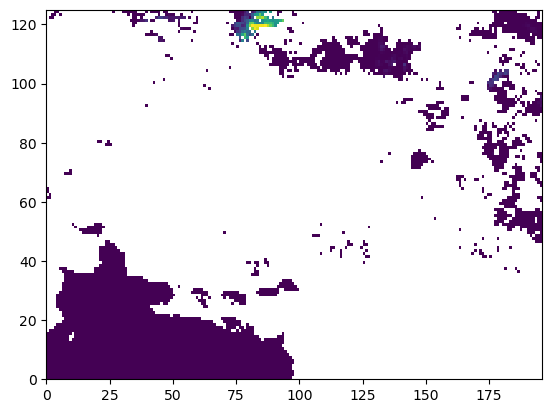

In [19]:
# just a preview.
preprocessed_file = os.path.join(ATMOS_DATA, "HSAF_pr.nc")
pre_HSAF = xr.open_dataset(preprocessed_file)
plt.figure()
plt.pcolormesh(pre_HSAF.pr[8000, ...])
pre_HSAF.pr[8000, 75:80, 75:80].values

In [9]:
# Define the start and end dates for the loop
date_start = "2020-07-01"
date_end = "2023-04-26"

# Open the preprocessed data
preprocessed_file = os.path.join(ATMOS_DATA, "HSAF_pr.nc")
pre_HSAF = xr.open_dataset(preprocessed_file)

# Iterate through each day in the date range
current_date = pd.to_datetime(date_start)
prev_month = None

while current_date <= pd.to_datetime(date_end):

    # Convert the current date to the required format
    current_date_str = current_date.strftime("%Y%m%d")

    # Define the file names
    original_file = os.path.join(HRES_OR, f"ADAPTER_DE05_{current_date_str}.12.0-90-1.boundary_1.nc")
    
    # Define the output directory path
    output_dir = os.path.join(PARFLOWCLM2, "sim", "ADAPTER_DE05_ECMWF-HRES_detforecast__FZJ-IBG3-ParFlowCLM380D_v03bJuwelsGpuProdClimatologyTl_PRhourly_HSAF_only", "forcing", "o.data.MARS_retrieval", current_date.strftime("%Y"))

    # Create the output directory if it doesn't exist
    os.makedirs(output_dir, exist_ok=True)

    # Define the output file path within the output directory
    output_file = os.path.join(output_dir, f"ADAPTER_DE05_{current_date_str}.12.0-90-1.boundary_1.nc")

    # Open the original file
    orig_HRES = xr.open_dataset(original_file)

    # Find the common dates between pre_HRES and orig_HRES
    common_dates = sorted(list(set(pre_HSAF.time.values) & set(orig_HRES.time.values)))

    # Get the indices for the common dates in pre_HRES and orig_HRES
    preprocessed_indices = np.where(np.isin(pre_HSAF.time.values, common_dates))[0]
    original_indices = np.where(np.isin(orig_HRES.time.values, common_dates))[0]

    # Convert the data from preprocessed HRES to cumulative
    cumulative_data = np.nancumsum(pre_HSAF.pr.values[preprocessed_indices], axis=0)

    # Replace precipitation data in the preprocessed file with original data (only if it is not nan).
    orig_HRES["tp"].values[original_indices] = cumulative_data/1000

    # Add a history attribute to the original file
    orig_HRES.attrs["history"] = "postprocessed by Kaveh - ATMOSCORRECT/HRES_POSTP.ipynb"

    # Save the modified original HRES file with the same name in the output directory
    orig_HRES.to_netcdf(output_file)

    # Print the month when it changes
    current_month = current_date.strftime("%m")
    if current_month != prev_month:
        print(f"{current_date.strftime('%Y')}/{current_month} postprocessing is completed.")
        prev_month = current_month

    # Move to the next day
    current_date += pd.DateOffset(days=1)

2020/07 postprocessing is completed.
2020/08 postprocessing is completed.
2020/09 postprocessing is completed.
2020/10 postprocessing is completed.
2020/11 postprocessing is completed.
2020/12 postprocessing is completed.
2021/01 postprocessing is completed.
2021/02 postprocessing is completed.
2021/03 postprocessing is completed.
2021/04 postprocessing is completed.
2021/05 postprocessing is completed.
2021/06 postprocessing is completed.
2021/07 postprocessing is completed.
2021/08 postprocessing is completed.
2021/09 postprocessing is completed.
2021/10 postprocessing is completed.
2021/11 postprocessing is completed.
2021/12 postprocessing is completed.
2022/01 postprocessing is completed.
2022/02 postprocessing is completed.
2022/03 postprocessing is completed.
2022/04 postprocessing is completed.
2022/05 postprocessing is completed.
2022/06 postprocessing is completed.
2022/07 postprocessing is completed.
2022/08 postprocessing is completed.
2022/09 postprocessing is completed.
2

### 4. Animation for Quality Control

(2021_0405_0)
(2021_0405_0)
(2021_0405_1)
(2021_0405_2)
(2021_0405_3)
(2021_0405_4)
(2021_0405_5)
(2021_0405_6)
(2021_0405_7)
(2021_0405_8)
(2021_0405_9)
(2021_0405_10)
(2021_0405_11)
(2021_0405_12)
(2021_0405_13)
(2021_0405_14)
(2021_0405_15)
(2021_0405_16)
(2021_0405_17)
(2021_0405_18)
(2021_0405_19)
(2021_0405_20)
(2021_0405_21)
(2021_0405_22)
(2021_0405_23)
(2021_0406_0)
(2021_0406_1)
(2021_0406_2)
(2021_0406_3)
(2021_0406_4)
(2021_0406_5)
(2021_0406_6)
(2021_0406_7)
(2021_0406_8)
(2021_0406_9)
(2021_0406_10)
(2021_0406_11)
(2021_0406_12)
(2021_0406_13)
(2021_0406_14)
(2021_0406_15)
(2021_0406_16)
(2021_0406_17)
(2021_0406_18)
(2021_0406_19)
(2021_0406_20)
(2021_0406_21)
(2021_0406_22)
(2021_0406_23)
(2021_0407_0)
(2021_0407_1)
(2021_0407_2)
(2021_0407_3)
(2021_0407_4)
(2021_0407_5)
(2021_0407_6)
(2021_0407_7)
(2021_0407_8)
(2021_0407_9)
(2021_0407_10)
(2021_0407_11)
(2021_0407_12)
(2021_0407_13)
(2021_0407_14)
(2021_0407_15)
(2021_0407_16)
(2021_0407_17)
(2021_0407_18)
(2021_0407_

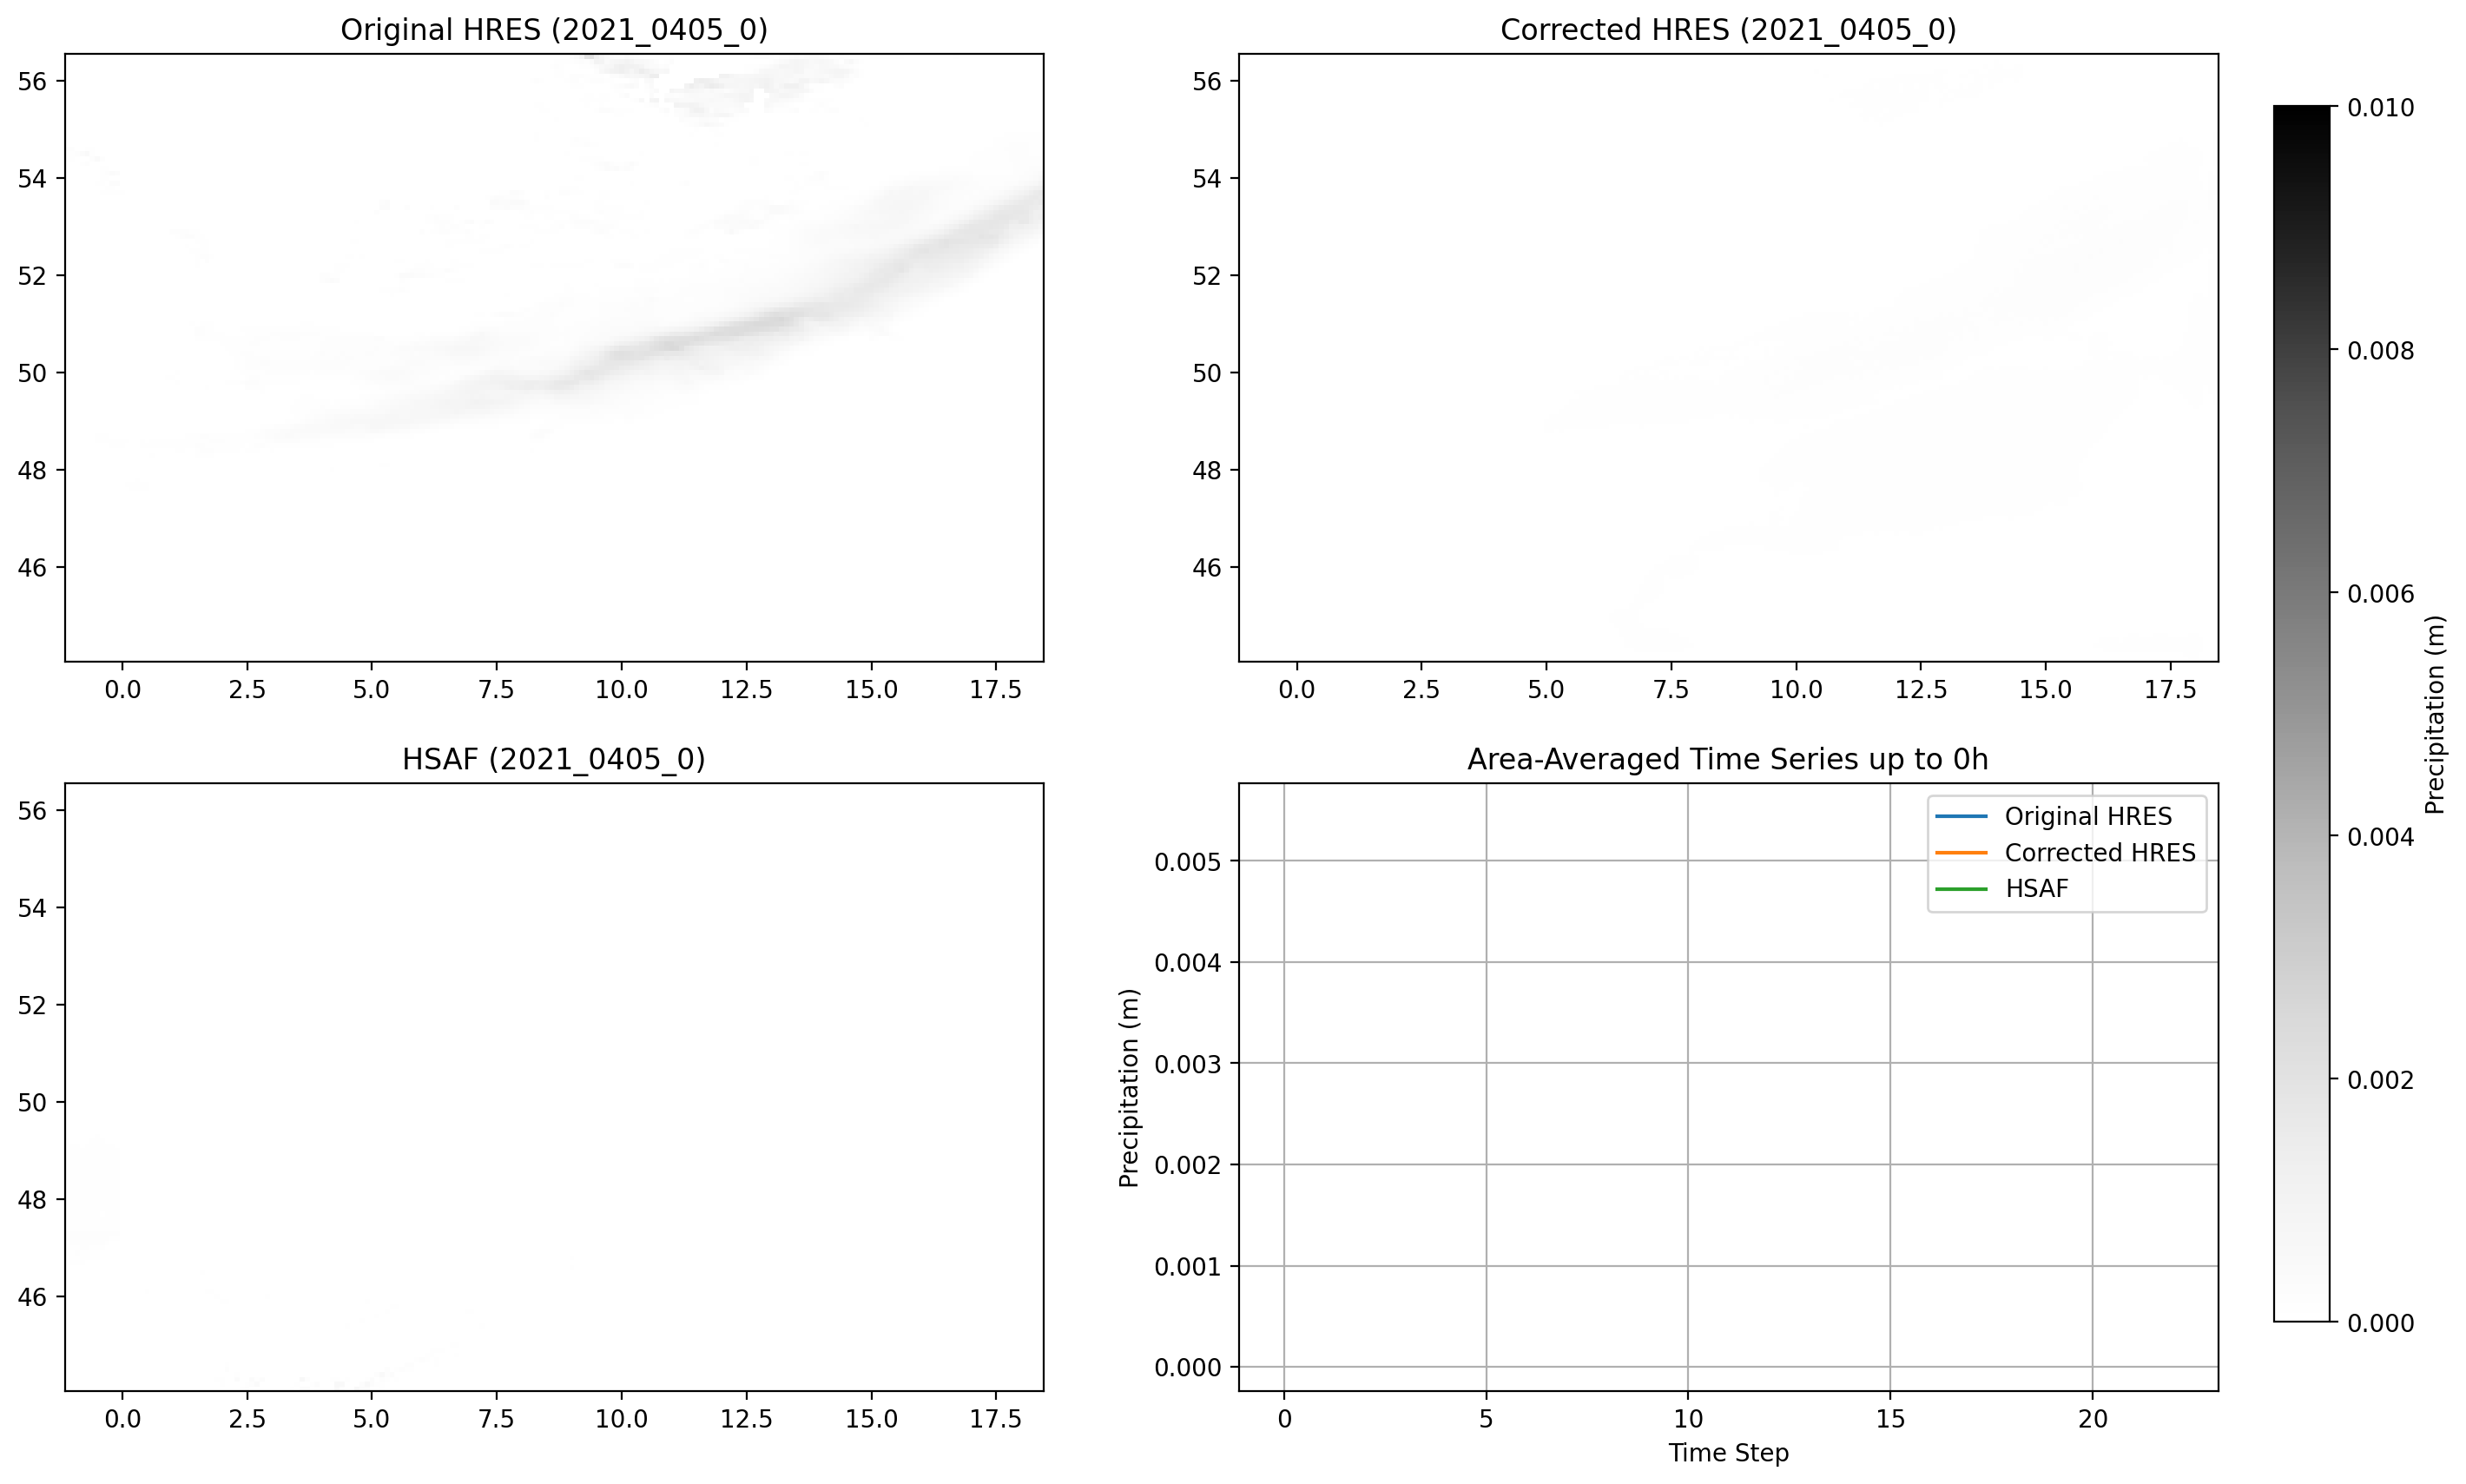

In [4]:
import random
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
#!pip install imageio
import imageio

topo_dir=PPROJECT_DIR+'/IO/03-TOPOGRAPHY/HSAF-TOPO.npz'
altitude = np.load(topo_dir)["arr_0"][..., 2]
land = np.where(altitude > 0, 1, np.nan)

# Define the parameters for the animation
yyy = 2021
start_ddmm = "0405"
end_ddmm = "0410"
maxmilimeter = 10
maxmeter = maxmilimeter / 1000

# Create a list of ddmm dates from start_ddmm to end_ddmm
ddmm_dates = [start_ddmm]
current_date = pd.to_datetime(f"{yyy}{start_ddmm}", format='%Y%m%d')
end_date = pd.to_datetime(f"{yyy}{end_ddmm}", format='%Y%m%d')

while current_date < end_date:
    current_date += pd.DateOffset(days=1)
    ddmm_dates.append(current_date.strftime("%m%d"))

# Create a figure with subplots for maps and time series
fig, axes = plt.subplots(2, 2, figsize=(16, 10), dpi=200)

# Create a single colorbar for all subplots
cax = fig.add_axes([0.92, 0.15, 0.02, 0.7])

# Function to generate frames for the animation
def animate(frame):
    
    i, ttt = frame

    ddmm = ddmm_dates[i]
    
    original_file = os.path.join(PARFLOWCLM2, "sim", "ADAPTER_DE05_ECMWF-HRES_detforecast__FZJ-IBG3-ParFlowCLM380D_v03bJuwelsGpuProdClimatologyTl_PRhourly",
                                "forcing", "o.data.MARS_retrieval", str(yyy), f"ADAPTER_DE05_{yyy}{ddmm}.12.0-90-1.boundary_1.nc")
    corrected_file = os.path.join(PARFLOWCLM2, "sim", "ADAPTER_DE05_ECMWF-HRES_detforecast__FZJ-IBG3-ParFlowCLM380D_v03bJuwelsGpuProdClimatologyTl_PRhourly_HRES_CORRECTED",
                                "forcing", "o.data.MARS_retrieval", str(yyy), f"ADAPTER_DE05_{yyy}{ddmm}.12.0-90-1.boundary_1.nc")
    hsaf_file = os.path.join(PARFLOWCLM2, "sim", "ADAPTER_DE05_ECMWF-HRES_detforecast__FZJ-IBG3-ParFlowCLM380D_v03bJuwelsGpuProdClimatologyTl_PRhourly_HSAF_only",
                            "forcing", "o.data.MARS_retrieval", str(yyy), f"ADAPTER_DE05_{yyy}{ddmm}.12.0-90-1.boundary_1.nc")

    orig_HRES = xr.open_dataset(original_file)
    corrected_HRES = xr.open_dataset(corrected_file)
    hsaf_data = xr.open_dataset(hsaf_file)
    
    # Plot the data using pcolormesh with the same colormap
    orig_HRES_tp = orig_HRES.tp.isel(time=ttt)
    corrected_HRES_tp = corrected_HRES.tp.isel(time=ttt)
    hsaf_tp = hsaf_data.tp.isel(time=ttt)
    
    # Apply the land mask directly to precipitation data
    orig_HRES_tp = orig_HRES_tp * land
    corrected_HRES_tp = corrected_HRES_tp * land
    hsaf_tp = hsaf_tp * land
    
    # Plot the data using pcolormesh with the same colormap
    c1 = axes[0, 0].pcolormesh(orig_HRES_tp.longitude, orig_HRES_tp.latitude, orig_HRES_tp, cmap='Greys', vmax=maxmeter)
    axes[0, 0].set_title(f"Original HRES ({yyy}_{ddmm}_{ttt})")

    c2 = axes[0, 1].pcolormesh(corrected_HRES_tp.longitude, corrected_HRES_tp.latitude, corrected_HRES_tp, cmap='Greys', vmax=maxmeter)
    axes[0, 1].set_title(f"Corrected HRES ({yyy}_{ddmm}_{ttt})")

    c3 = axes[1, 0].pcolormesh(hsaf_tp.longitude, hsaf_tp.latitude, hsaf_tp, cmap='Greys', vmax=maxmeter)
    axes[1, 0].set_title(f"HSAF ({yyy}_{ddmm}_{ttt})")

    # Compute the area-averaged time series up to ttt
    axes[1, 1].cla()
    orig_HRES_ts = np.nanmean(orig_HRES.tp[:ttt, ...], axis=(1, 2))
    corrected_HRES_ts = np.nanmean(corrected_HRES.tp[:ttt, ...], axis=(1, 2))
    hsaf_ts = np.nanmean(hsaf_data.tp[:ttt, ...], axis=(1, 2))
    
    axes[1, 1].plot(orig_HRES_ts, label='Original HRES')
    axes[1, 1].plot(corrected_HRES_ts, label='Corrected HRES')
    axes[1, 1].plot(hsaf_ts, label='HSAF')
    axes[1, 1].set_xlabel('Time Step')
    axes[1, 1].set_ylabel('Precipitation (m)')
    axes[1, 1].set_title(f'Area-Averaged Time Series up to {ttt}h')
    axes[1, 1].grid(True)
    axes[1, 1].legend()

    # Update the colorbar
    fig.colorbar(c3, cax=cax, label='Precipitation (m)')
    
    print(f"({yyy}_{ddmm}_{ttt})")

# Create the animation
ani = FuncAnimation(fig, animate, frames=((i, ttt) for i in range(len(ddmm_dates)) for ttt in range(24)), interval=2000, save_count=int(len(ddmm_dates)*24))  # Change interval as needed (in milliseconds)

# Save the animation as a GIF
ani.save(DUMP_PLOT+'/animation_comparison_' + start_ddmm + "__" + end_ddmm + '.gif', writer='pillow', fps=2)  # Adjust fps as needed
